<a href="https://www.kaggle.com/code/sahilkumbhare/logistic-regression?scriptVersionId=119926536" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pmt
import math

%matplotlib inline

In [2]:
#1 IMPORTING THE CSV
titanic_data = pd.read_csv('/kaggle/input/titanic-data/titanic.CSV')

In [3]:
titanic_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [4]:
titanic_data.tail

<bound method NDFrame.tail of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [5]:
#COUNTING THE NO OF PASSENGERS IN THE DATA
print('no of passenger:' +str(len(titanic_data.index)))

no of passenger:891


#ANALYZING THE DATA

<AxesSubplot:xlabel='Survived', ylabel='count'>

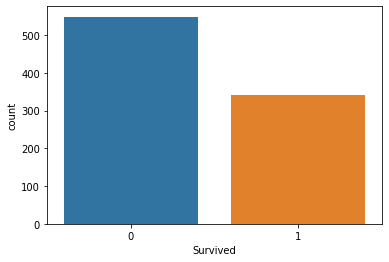

In [6]:
sns.countplot(x='Survived',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

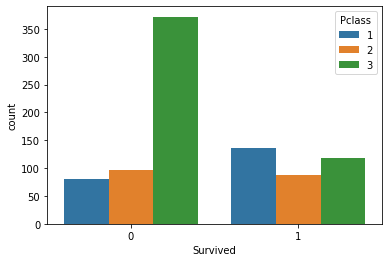

In [7]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

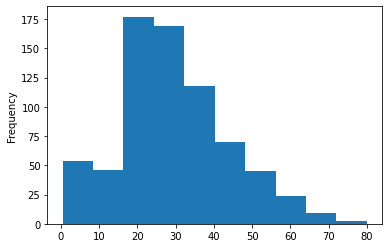

In [8]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

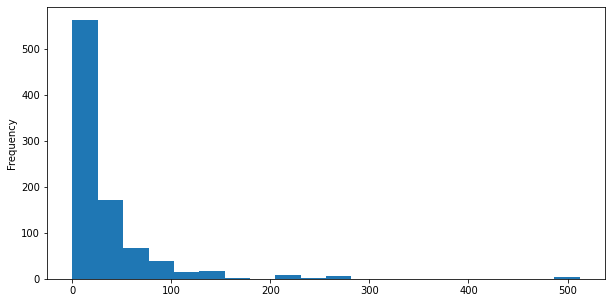

In [9]:
titanic_data['Fare'].plot.hist (bins=20,figsize=(10,5))

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

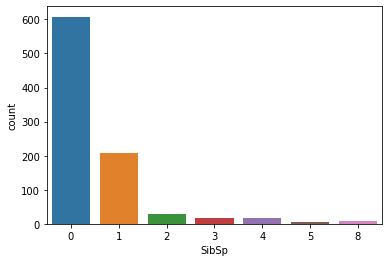

In [11]:
sns.countplot(x='SibSp',data=titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

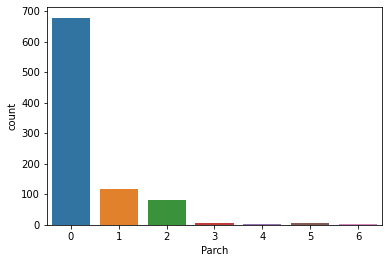

In [12]:
sns.countplot(x='Parch',data=titanic_data)

#3 DATA WRANGLING

In [13]:
#LOOKING FOR THE NULL VALUES
titanic_data.isnull

<bound method DataFrame.isnull of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [14]:
#COUNTING OF NULLS
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

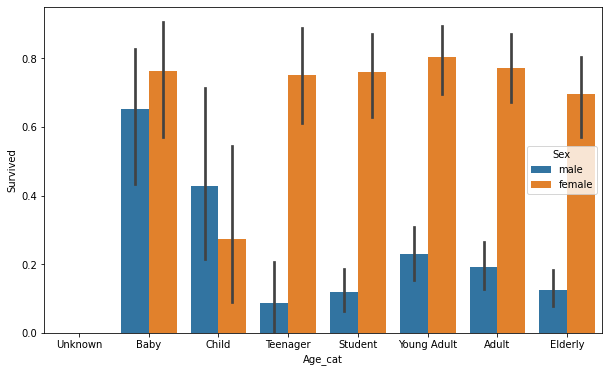

In [15]:
def get_category(age):
    cat = ''
    
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat 

# adjust graph size 
pmt.figure(figsize=(10,6))

# display X-values in order
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_data['Age_cat'] = titanic_data['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_data, order=group_names)

titanic_data.drop('Age_cat', axis=1, inplace=True)

<AxesSubplot:>

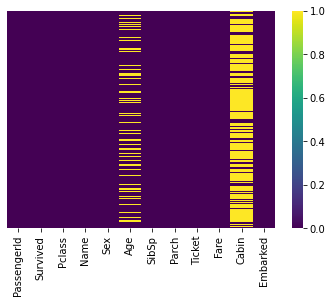

In [16]:
#HEATMAPS FOR NULL
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

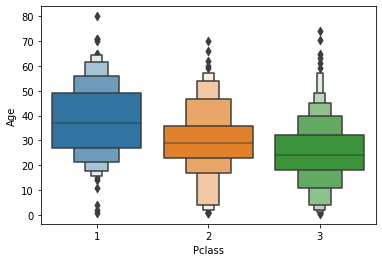

In [17]:
#BOX PLOT
sns.boxenplot(x='Pclass',y='Age',data=titanic_data)

In [18]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#DROPPING THE NULL VALUES FROM THE FRAME 
titanic_data.dropna(inplace=True)

In [21]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

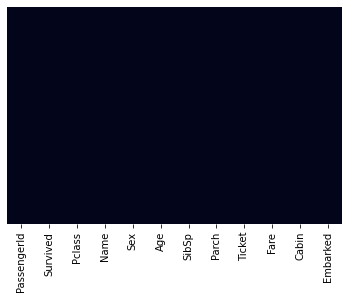

In [22]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

# DATA WRANGLING CLEAN THE DATA BY REMOVING NULL AND UNECESSARY VALUE

In [23]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [24]:
pd.get_dummies(titanic_data['Sex'])

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [25]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
1,0
3,0
6,1
10,0
11,0


In [26]:
embark = pd.get_dummies(titanic_data['Embarked'])
embark.head(5)

,C,Q,S
1,1,0,0
3,0,0,1
6,0,0,1
10,0,0,1
11,0,0,1


In [27]:
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [28]:
pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl.head(5)

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [29]:
titanic_data = pd.concat([titanic_data,sex,embark,pcl],axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0,0


#4 TRAIN AND TEST 

BUILD THE MODEL ON THE TRAIN DATA AND PREDICT ON THE TEST DATA


In [30]:
X = titanic_data.drop('Survived',axis=1)
Y = titanic_data['Survived']


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#DATA ENCODING 
from sklearn import preprocessing

def encode_featurete(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']

    for features in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[features])
        dataDF[features] = le.transform(dataDF[features])

    return dataDF

titanic_data = encode_featurete(titanic_data)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,72,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,48,2,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,117,2,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,131,2,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,43,2,0,0,1,0,0


In [33]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    int64  
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    int64  
 11  Embarked     183 non-null    int64  
 12  male         183 non-null    uint8  
 13  Q            183 non-null    uint8  
 14  S            183 non-null    uint8  
 15  2            183 non-null    uint8  
 16  3            183 non-null    uint8  
dtypes: float64(2), int64(8), object(2), uint8(5)
memory usage: 19.5+ KB



#Exploration page for the current dataset 

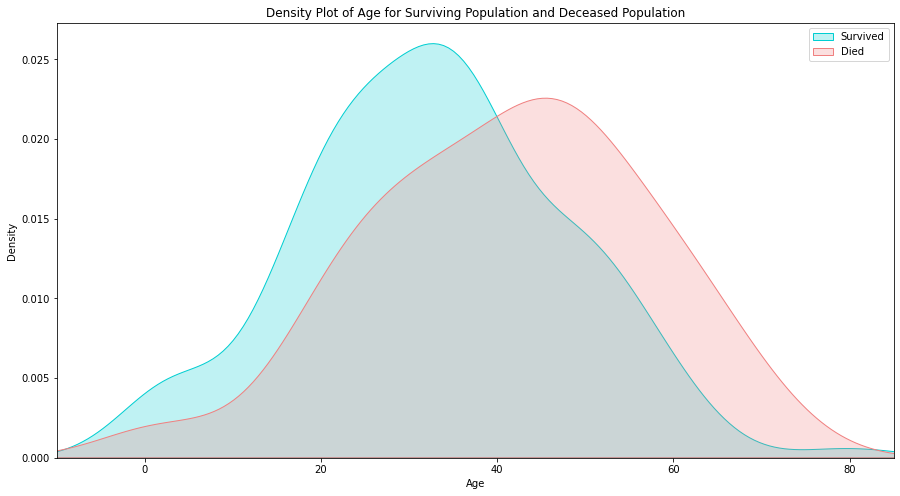

In [34]:
pmt.figure(figsize=(15,8))
ax = sns.kdeplot(titanic_data["Age"][titanic_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_data["Age"][titanic_data.Survived == 0], color="lightcoral", shade=True)
pmt.legend(['Survived', 'Died'])
pmt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
pmt.xlim(-10,85)
pmt.show()

The key difference is that among survivors a larger proportion were children. The passengers a generous attempt to save children by giving them a place on the life boat.        

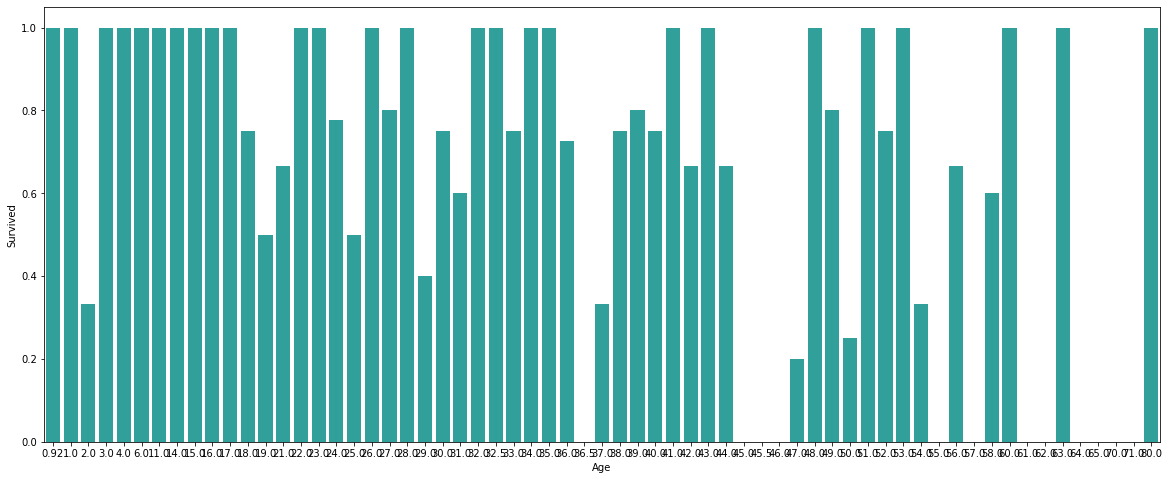

In [35]:
pmt.figure(figsize=(20,8))
avg_survival_byage = titanic_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
pmt.show()

In [36]:
titanic_data['IsMinor']=np.where(titanic_data['Age']<=16, 1, 0)

titanic_data['IsMinor']=np.where(titanic_data['Age']<=16, 1, 0)

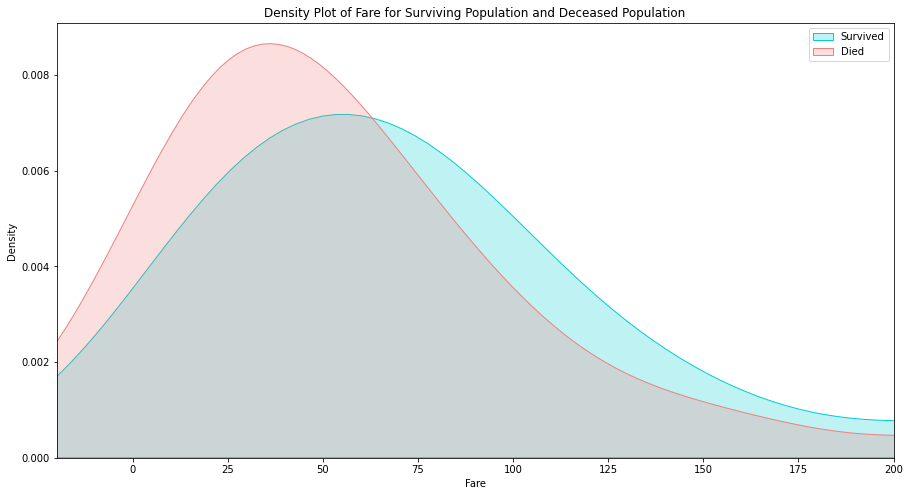

In [37]:
pmt.figure(figsize=(15,8))
ax = sns.kdeplot(titanic_data["Fare"][titanic_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic_data["Fare"][titanic_data.Survived == 0], color="lightcoral", shade=True)
pmt.legend(['Survived', 'Died'])
pmt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
pmt.xlim(-20,200)
pmt.show()